### <b>Page Rank Algorithm using Random walk method</b>

A directed graph has 2 components: nodes and edges where pages are nodes and hyperlinks are edges. The value of pagerank is the probability between 0 and 1

**Random Walk Method**
* Select random graph from python library
* Initialize all nodes with initial rank values at 0
* Randomly pick source nodes
* Create list to store neighbors of souce nodes
* Pick node from lists randomly and increment its rank
* Check if node is a sink node ( does not have outgoing edges)
    * yes:pick random node & increment rank
    * no: pick node from list & increment rank
* Continue untill resulting vector with rank for every single page converges

In [2]:
# Importing Required Libraries
import networkx as nx
import random
import matplotlib.pyplot as plt
import operator

In [3]:
# Creating random nodes
g = nx.gnp_random_graph(10,0.5, directed = True)

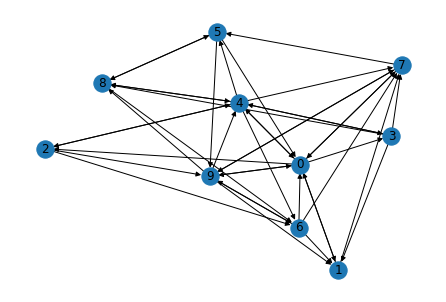

In [4]:
# plotting our nodes
nx.draw(g,with_labels=True)
plt.show()

In [5]:
#pick source node randomly
x = random.choice([i for i in range(g.number_of_nodes())])
# initialize all nodes as 0
dict_count = {}
for i in range(g.number_of_nodes()):
               dict_count[i]=0
dict_count[x] = dict_count[x]+1

#Look at neighbours of x
for i in range(1000000):
               #create list to store neighbors
               list_n = list(g.neighbors(x))
               if (len(list_n) == 0):
                    x= random.choice([i for i in range(g.number_of_nodes())])
                    dict_count[x]= dict_count[x]+1
                    
               else:
                    x= random.choice(list_n)
                    dict_count[x]= dict_count[x]+1

In [6]:
# verification
p = nx.pagerank(g)
#sort values
sort_p = sorted(p.items(),key=operator.itemgetter(1))
sort_rw = sorted(dict_count.items(), key = operator.itemgetter(1))
print(sort_p)

print(sort_rw)

[(2, 0.05175959009238873), (3, 0.05175959009238873), (8, 0.08408453064189733), (6, 0.08584772124041251), (1, 0.08725220041588527), (5, 0.09080432553448185), (4, 0.10749921911248853), (9, 0.13626771748334157), (7, 0.13738807222863478), (0, 0.1673370331580806)]
[(2, 45335), (3, 45335), (8, 80265), (6, 80827), (1, 85090), (5, 90006), (4, 107130), (9, 142976), (7, 143136), (0, 179901)]


**_Thus, we see that after some iterations page rank obtained from random walk method matches with values obtained from built in function of python._**